In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch

In [ ]:
device = torch.device("cuda:0")
print(torch.cuda.is_available())
print(torch.cuda.get_device_name(torch.cuda.current_device()))
torch.set_default_tensor_type('torch.cuda.FloatTensor')

True
Tesla T4


With the same setup as experiment 1, we'll vary the number of dimensions over a fixed sample size. We will also try different settings of SNR

# Well-Specified Models

In [ ]:
sigma1 = 0.1 #SNR = 100
sigma2 = 0.5 #SNR = 4
sigma3 = 1 #SNR = 1

sigmas = [sigma1, sigma2, sigma3]

## 200 Samples

In [ ]:
n = 200

small_d = torch.arange(5,170,5)
around_n = torch.arange(170,196,2)
around_n_greater = torch.arange(196,204,1)
large_d = torch.arange(204,250,2)
larger_d = torch.arange(250,500,5)
largest_d = torch.arange(500,700,10)


d_vals = torch.cat([small_d,around_n,around_n_greater,large_d,larger_d,largest_d])
print(d_vals.size()[0])
M = d_vals.size()[0]

sim = 40

147


In [ ]:
test_mse100 = torch.zeros((M,sim))
test_mse4 = torch.zeros((M,sim))
test_mse1 = torch.zeros((M,sim))

print(test_mse100.shape)

torch.Size([147, 40])


In [ ]:
# Creating X and Y for each dimension and running 15 simulations

for s in sigmas:
  for i in range(M):
    for j in range(sim):
      mean = torch.zeros((d_vals[i],))
      Id = torch.eye(d_vals[i]) #Identity matrix for multivariate normal std
      norm = torch.distributions.multivariate_normal.MultivariateNormal(mean, Id)
      X = norm.sample((n,)) #X data
      X2 = norm.sample((n,)) #X test

      beta = torch.rand(d_vals[i])  #Arbitrary beta
      beta = beta / torch.linalg.norm(beta)  #making sure norm = 1
  
      noise = torch.normal(torch.zeros((n,)), torch.full((n,), s))
      noise2 = torch.normal(torch.zeros((n,)), torch.full((n,), s))

      Y = torch.matmul(X,beta) + noise     #Calculating Y from X
      Y2 = torch.matmul(X2,beta) + noise2   #Test Y
    
      if n < d_vals[i]:
        beta_hat = torch.matmul(torch.linalg.pinv(X),Y)
      else:
        p1 = torch.linalg.inv(torch.matmul(torch.t(X),X))
        p2 = torch.matmul(p1,torch.t(X))
        beta_hat = torch.matmul(p2,Y)

      test_pred = torch.matmul(X2,beta_hat)

      if s == 0.1:
        test_mse100[i,j] = torch.mean((Y2 - test_pred)**2)
      elif s == 0.5:
        test_mse4[i,j] = torch.mean((Y2 - test_pred)**2)
      else:
        test_mse1[i,j] = torch.mean((Y2 - test_pred)**2)

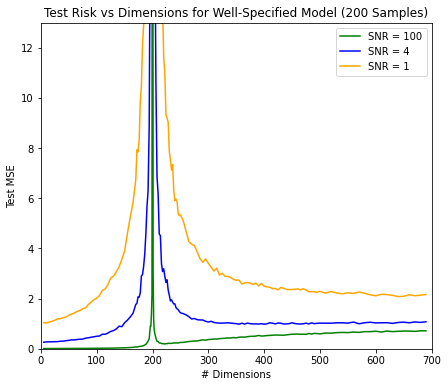

In [ ]:
avgs_100 = torch.mean(test_mse100, 1)
avgs_4 = torch.mean(test_mse4, 1)
avgs_1 = torch.mean(test_mse1, 1)

plt.figure(figsize=(7,6))
plt.title("Test Risk vs Dimensions for Well-Specified Model (200 Samples)")
plt.xlabel("# Dimensions")
plt.ylabel("Test MSE")
lw = 2
plt.ylim(0,13)
plt.xlim(0,700)
plt.plot(d_vals.cpu().numpy(), avgs_100.cpu().numpy(),
         color='green', label='SNR = 100')
plt.plot(d_vals.cpu().numpy(), avgs_4.cpu().numpy(),
         color='blue', label='SNR = 4')
plt.plot(d_vals.cpu().numpy(), avgs_1.cpu().numpy(),
         color='orange', label='SNR = 1')
plt.plot()
plt.legend(loc="best")
plt.show()

## 500 Samples

In [ ]:
n2 = 500

small_d2 = torch.arange(5,380,10)
around_n2 = torch.arange(380,470,5)
around_n_greater2 = torch.arange(470,490,2)
large_d2 = torch.arange(490,510,1)
larger_d2 = torch.arange(510,600,2)
more_d2 = torch.arange(600,700,5)
largest_d2 = torch.arange(700,1001,5)


d_vals2 = torch.cat([small_d2,around_n2,around_n_greater2,large_d2,larger_d2,more_d2,largest_d2])
print(d_vals2.size()[0])
M2 = d_vals2.size()[0]


212


In [ ]:
test_mse100_2 = torch.zeros((M2,sim))
test_mse4_2 = torch.zeros((M2,sim))
test_mse1_2 = torch.zeros((M2,sim))

print(test_mse100_2.shape)

torch.Size([212, 40])


In [ ]:
# Creating X and Y for each dimension and running 15 simulations

for s in sigmas:
  for i in range(M2):
    for j in range(sim):
      mean = torch.zeros((d_vals2[i],))
      Id = torch.eye(d_vals2[i]) #Identity matrix for multivariate normal std
      norm = torch.distributions.multivariate_normal.MultivariateNormal(mean, Id)
      X = norm.sample((n2,)) #X data
      X2 = norm.sample((n2,)) #X test

      beta = torch.rand(d_vals2[i])  #Arbitrary beta
      beta = beta / torch.linalg.norm(beta)  #making sure norm = 1
  
      noise = torch.normal(torch.zeros((n2,)), torch.full((n2,), s))
      noise2 = torch.normal(torch.zeros((n2,)), torch.full((n2,), s))

      Y = torch.matmul(X,beta) + noise     #Calculating Y from X
      Y2 = torch.matmul(X2,beta) + noise2   #Test Y
    
      if n2 < d_vals2[i]:
        beta_hat = torch.matmul(torch.linalg.pinv(X),Y)
      else:
        p1 = torch.linalg.inv(torch.matmul(torch.t(X),X))
        p2 = torch.matmul(p1,torch.t(X))
        beta_hat = torch.matmul(p2,Y)

      test_pred = torch.matmul(X2,beta_hat)

      if s == 0.1:
        test_mse100_2[i,j] = torch.mean((Y2 - test_pred)**2)
      elif s == 0.5:
        test_mse4_2[i,j] = torch.mean((Y2 - test_pred)**2)
      else:
        test_mse1_2[i,j] = torch.mean((Y2 - test_pred)**2)

Next, we plot:

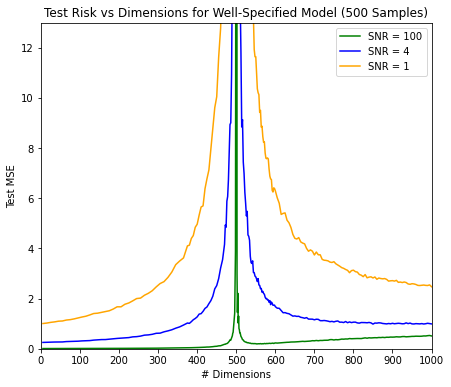

In [ ]:
avgs_100_2 = torch.mean(test_mse100_2, 1)
avgs_4_2 = torch.mean(test_mse4_2, 1)
avgs_1_2 = torch.mean(test_mse1_2, 1)

plt.figure(figsize=(7,6))
plt.title("Test Risk vs Dimensions for Well-Specified Model (500 Samples)")
plt.xlabel("# Dimensions")
plt.ylabel("Test MSE")
lw = 2
plt.ylim(0,13)
plt.xlim(0,1000)
plt.plot(d_vals2.cpu().numpy(), avgs_100_2.cpu().numpy(),
         color='green', label='SNR = 100')
plt.plot(d_vals2.cpu().numpy(), avgs_4_2.cpu().numpy(),
         color='blue', label='SNR = 4')
plt.plot(d_vals2.cpu().numpy(), avgs_1_2.cpu().numpy(),
         color='orange', label='SNR = 1')
plt.xticks(torch.arange(0,1001,step=100).cpu().numpy())
plt.plot()
plt.legend(loc="best")
plt.show()

## 1000 Samples

In [ ]:
n3 = 1000

small_d3 = torch.arange(5,700,10)
around_n3 = torch.arange(700,930,5)
around_n2_smaller3 = torch.arange(930,990,2)
around_n_greater3 = torch.arange(990,1010,1)
large_d3 = torch.arange(1010,1070,2)
larger_d3 = torch.arange(1070,1500,5)
more_d3 = torch.arange(1500,1900,10)
largest_d3 = torch.arange(1900,3000,20)


d_vals3 = torch.cat([small_d3,around_n3,around_n_greater3,around_n2_smaller3,
                     large_d3,larger_d3,more_d3,largest_d3])
print(d_vals3.size()[0])
M3 = d_vals3.size()[0]

sim2 = 20


377


In [ ]:
test_mse100_3 = torch.zeros((M3,sim2))
test_mse4_3 = torch.zeros((M3,sim2))
test_mse1_3 = torch.zeros((M3,sim2))

print(test_mse100_3.shape)

torch.Size([377, 20])


In [ ]:
for s in sigmas:
  for i in range(M3):
    for j in range(sim2):
      mean = torch.zeros((d_vals3[i],))
      Id = torch.eye(d_vals3[i]) #Identity matrix for multivariate normal std
      norm = torch.distributions.multivariate_normal.MultivariateNormal(mean, Id)
      X = norm.sample((n3,)) #X data
      X2 = norm.sample((n2,)) #X test (using 500 test samples)

      beta = torch.rand(d_vals3[i])  #Arbitrary beta
      beta = beta / torch.linalg.norm(beta)  #making sure norm = 1
  
      noise = torch.normal(torch.zeros((n3,)), torch.full((n3,), s))
      noise2 = torch.normal(torch.zeros((n2,)), torch.full((n2,), s))

      Y = torch.matmul(X,beta) + noise     #Calculating Y from X
      Y2 = torch.matmul(X2,beta) + noise2   #Test Y
    
      if n3 < d_vals3[i]:
        beta_hat = torch.matmul(torch.linalg.pinv(X),Y)
      else:
        p1 = torch.linalg.inv(torch.matmul(torch.t(X),X))
        p2 = torch.matmul(p1,torch.t(X))
        beta_hat = torch.matmul(p2,Y)

      test_pred = torch.matmul(X2,beta_hat)

      if s == 0.1:
        test_mse100_3[i,j] = torch.mean((Y2 - test_pred)**2)
      elif s == 0.5:
        test_mse4_3[i,j] = torch.mean((Y2 - test_pred)**2)
      else:
        test_mse1_3[i,j] = torch.mean((Y2 - test_pred)**2)

Next, we plot:

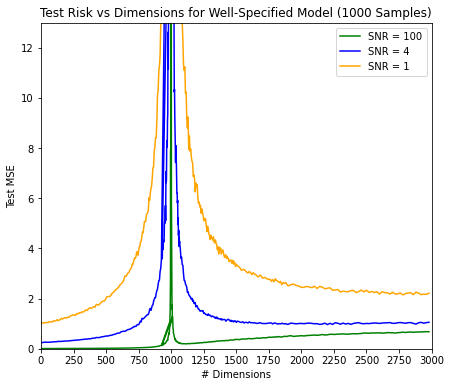

In [ ]:
avgs_100_3 = torch.mean(test_mse100_3, 1)
avgs_4_3 = torch.mean(test_mse4_3, 1)
avgs_1_3 = torch.mean(test_mse1_3, 1)

plt.figure(figsize=(7,6))
plt.title("Test Risk vs Dimensions for Well-Specified Model (1000 Samples)")
plt.xlabel("# Dimensions")
plt.ylabel("Test MSE")
lw = 2
plt.ylim(0,13)
plt.xlim(0,3000)
plt.plot(d_vals3.cpu().numpy(), avgs_100_3.cpu().numpy(),
         color='green', label='SNR = 100')
plt.plot(d_vals3.cpu().numpy(), avgs_4_3.cpu().numpy(),
         color='blue', label='SNR = 4')
plt.plot(d_vals3.cpu().numpy(), avgs_1_3.cpu().numpy(),
         color='orange', label='SNR = 1')
plt.xticks(torch.arange(0,3001,step=250).cpu().numpy())
plt.plot()
plt.legend(loc="best")
plt.show()

The three plots in terms of gamma:

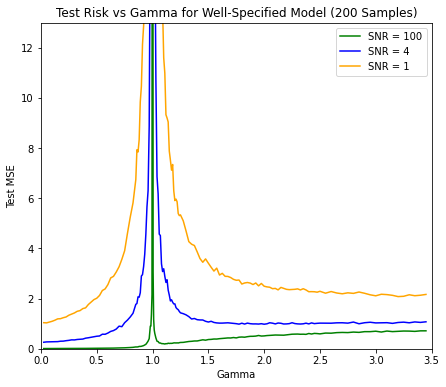

In [ ]:
#200 samples

gammas = d_vals / n

plt.figure(figsize=(7,6))
plt.title("Test Risk vs Gamma for Well-Specified Model (200 Samples)")
plt.xlabel("Gamma")
plt.ylabel("Test MSE")
lw = 2
plt.ylim(0,13)
plt.xlim(0,3.5)
plt.plot(gammas.cpu().numpy(), avgs_100.cpu().numpy(),
         color='green', label='SNR = 100')
plt.plot(gammas.cpu().numpy(), avgs_4.cpu().numpy(),
         color='blue', label='SNR = 4')
plt.plot(gammas.cpu().numpy(), avgs_1.cpu().numpy(),
         color='orange', label='SNR = 1')
plt.plot()
plt.legend(loc="best")
plt.show()

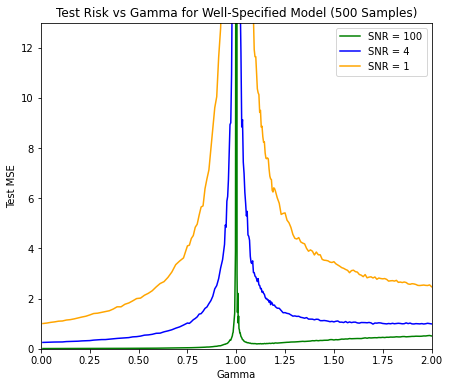

In [ ]:
#500 samples

gammas2 = d_vals2 / n2

plt.figure(figsize=(7,6))
plt.title("Test Risk vs Gamma for Well-Specified Model (500 Samples)")
plt.xlabel("Gamma")
plt.ylabel("Test MSE")
lw = 2
plt.ylim(0,13)
plt.xlim(0,2)
plt.plot(gammas2.cpu().numpy(), avgs_100_2.cpu().numpy(),
         color='green', label='SNR = 100')
plt.plot(gammas2.cpu().numpy(), avgs_4_2.cpu().numpy(),
         color='blue', label='SNR = 4')
plt.plot(gammas2.cpu().numpy(), avgs_1_2.cpu().numpy(),
         color='orange', label='SNR = 1')
plt.plot()
plt.legend(loc="best")
plt.show()

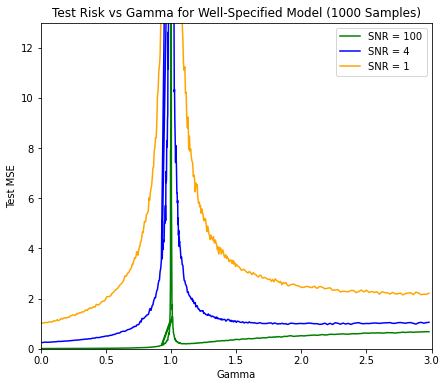

In [ ]:
#1000 samples

gammas3 = d_vals3 / n3

plt.figure(figsize=(7,6))
plt.title("Test Risk vs Gamma for Well-Specified Model (1000 Samples)")
plt.xlabel("Gamma")
plt.ylabel("Test MSE")
lw = 2
plt.ylim(0,13)
plt.xlim(0,3)
plt.plot(gammas3.cpu().numpy(), avgs_100_3.cpu().numpy(),
         color='green', label='SNR = 100')
plt.plot(gammas3.cpu().numpy(), avgs_4_3.cpu().numpy(),
         color='blue', label='SNR = 4')
plt.plot(gammas3.cpu().numpy(), avgs_1_3.cpu().numpy(),
         color='orange', label='SNR = 1')
plt.plot()
plt.legend(loc="best")
plt.show()